# Data Wrangling

In [49]:
import pandas as pd
import matplotlib.pyplot as plt  
import plotly.express as px 
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose

**Importing Data**

In [34]:
def wrangle(filepath):
    #Read data into csv
    df = pd.read_csv(filepath)
    
    # Combine 'Year' and 'Month' into a 'Date' column
    df['Date'] = df['Month'] + ' ' + df["Year \xa0 \xa0 \xa0"].astype(str)

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%B %Y')

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Sort the DataFrame by the new datetime index
    df.sort_index(inplace=True)

    # Keep only the 'Fraud Volumes (In Millions)' column
    fraud_series = df['Fraud Volumes (In Millions)']

    return fraud_series

In [45]:
fraud_series=wrangle(filepath="data/fraud_data.csv")
fraud_series.head()

Date
2009-07-01    4288.5786
2009-08-01    4365.7617
2009-09-01    4222.9797
2009-10-01    4366.1658
2009-11-01    3143.0898
Name: Fraud Volumes (In Millions), dtype: float64

**Line plot**

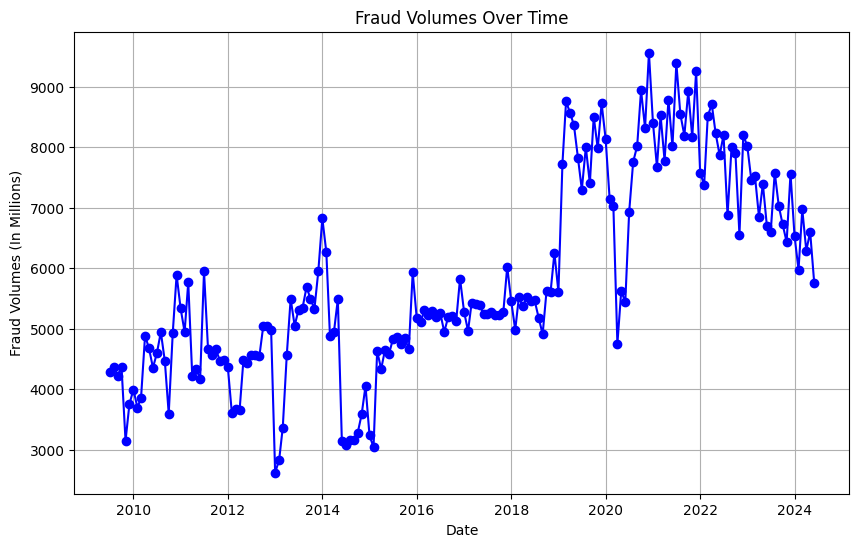

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(fraud_series, marker='o', linestyle='-', color='b')
plt.title('Fraud Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Volumes (In Millions)')
plt.grid(True)
plt.show()

**Rolling Mean**

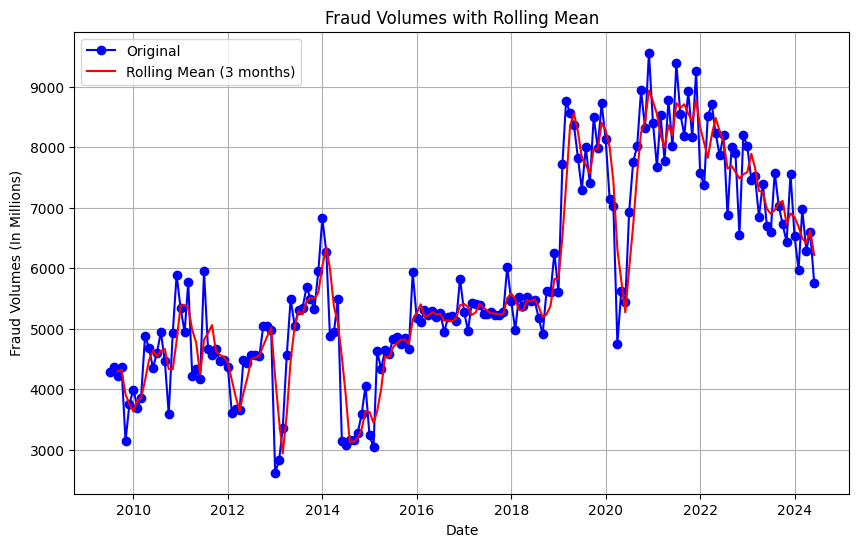

In [48]:
# Calculate the rolling mean with a window of 3 periods
rolling_mean = fraud_series.rolling(window=3).mean()

plt.figure(figsize=(10, 6))
plt.plot(fraud_series, marker='o', linestyle='-', color='b', label='Original')
plt.plot(rolling_mean, color='r', label='Rolling Mean (3 months)')
plt.title('Fraud Volumes with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Fraud Volumes (In Millions)')
plt.legend()
plt.grid(True)
plt.show()


**Seasonal Decomposition Plot**

In [ ]:


# Decompose the time series using an additive model
decomposition = seasonal_decompose(fraud_volumes, model='additive', period=1)
decomposition.plot()
plt.show()
